In [1]:
import requests
from bs4 import BeautifulSoup
from urllib.request import urlopen as uReq
import pandas as pd
import time
import re

In [2]:
GReviews=[]
page_num=input("Enter the number of pages")
for i in range(1,int(page_num)+1):
    url="https://www.amazon.in/Google-Pixel-5G-128GB-Black/product-reviews/B08H8X23ZB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"+str(i)
    req=requests.get(url)
    content=BeautifulSoup(req.content,'html.parser')
    Reviews= content.find_all('span',{"data-hook":"review-body" })
    print(len(Reviews))
    for i in Reviews:
        GReviews.append(i.text)

Enter the number of pages150
10
0
10
10
0
0
10
0
0
0
10
10
0
0
0
10
0
10
10
10
10
0
0
10
0
0
10
10
10
0
10
10
10
0
10
10
0
10
10
10
10
10
10
10
0
10
10
0
10
0
0
0
10
10
10
0
10
10
10
10
0
10
0
10
0
10
0
0
0
10
10
0
0
0
0
10
10
0
10
10
10
10
0
0
0
0
0
10
10
10
0
10
10
0
0
0
0
10
10
0
0
10
0
10
0
0
10
0
0
10
0
0
0
10
10
10
10
10
10
0
10
10
0
0
10
10
0
10
10
10
0
0
0
10
0
0
10
0
0
0
0
10
10
0
0
0
0
0
10
10


In [3]:
GReviews

['\nThis phone has a severe defect of phone calls clarity. The phone call voice is too distorted and not at all clear. I am struggling to listen to other people\'s talk. This is a common issue of pixel 5, as I now understand. If I knew this earlier, I wouldn\'t have bought this.In this phone, the earpiece speaker is not visible, they use an "in display" speaker which is hidden under the glass screen. I think that is the cause of sound distortion. When I take the phone I can feel something moving inside unloose. Perhaps the under the display display is loose? I don\'t know whether this phone has a repair service in India. This issue can be a software issue too because sometimes the phone calls are not clear in the speaker phone too. I have ordered a Bluetooth headset and waiting to see that phone calls are clear in that. However the calls are audible in my car\'s bluetooth speaker.Other than this, this is an awesome phone, compact cute and a very good performer overall. The music and ot

In [4]:
rev_string=" ".join(GReviews)
rev_string

'\nThis phone has a severe defect of phone calls clarity. The phone call voice is too distorted and not at all clear. I am struggling to listen to other people\'s talk. This is a common issue of pixel 5, as I now understand. If I knew this earlier, I wouldn\'t have bought this.In this phone, the earpiece speaker is not visible, they use an "in display" speaker which is hidden under the glass screen. I think that is the cause of sound distortion. When I take the phone I can feel something moving inside unloose. Perhaps the under the display display is loose? I don\'t know whether this phone has a repair service in India. This issue can be a software issue too because sometimes the phone calls are not clear in the speaker phone too. I have ordered a Bluetooth headset and waiting to see that phone calls are clear in that. However the calls are audible in my car\'s bluetooth speaker.Other than this, this is an awesome phone, compact cute and a very good performer overall. The music and oth

In [5]:
rev_string=re.sub("[^A-ZA-z" "]+"," ",rev_string).lower()
rev_string=re.sub("[0-9" "]+"," ", rev_string)

In [6]:
rev_string

' this phone has a severe defect of phone calls clarity the phone call voice is too distorted and not at all clear i am struggling to listen to other people s talk this is a common issue of pixel as i now understand if i knew this earlier i wouldn t have bought this in this phone the earpiece speaker is not visible they use an in display speaker which is hidden under the glass screen i think that is the cause of sound distortion when i take the phone i can feel something moving inside unloose perhaps the under the display display is loose i don t know whether this phone has a repair service in india this issue can be a software issue too because sometimes the phone calls are not clear in the speaker phone too i have ordered a bluetooth headset and waiting to see that phone calls are clear in that however the calls are audible in my car s bluetooth speaker other than this this is an awesome phone compact cute and a very good performer overall the music and other sounds are clear and goo

In [7]:
rev_words=rev_string.split(" ")

In [8]:
rev_string= " ".join(rev_words)

In [9]:
from nltk import tokenize
reviews= tokenize.sent_tokenize(''.join(GReviews))

In [10]:
reviews_df= pd.DataFrame(reviews,columns=["amazon_reviews"])
reviews_df

,amazon_reviews
0,\nThis phone has a severe defect of phone call...
1,The phone call voice is too distorted and not ...
2,I am struggling to listen to other people's talk.
3,"This is a common issue of pixel 5, as I now un..."
4,"If I knew this earlier, I wouldn't have bought..."
...,...
4051,Camera quality much more better then those qua...
4052,Bettery life great for now😃.
4053,Once I charged it last more than one 30 hrs.
4054,But if your not gamer 😂.


In [11]:
#removing punctuations converting text into lower case
def clean_text1(text):
    text=text.lower()
    text=re.sub(r'[^\w\s]','',text)
    text=re.sub(r'\d{1,10}', '',text)
    text=re.sub(r'\n','',text)
    return text
round1=lambda x:clean_text1(x)

In [12]:
import nltk
reviews_clean=pd.DataFrame(reviews_df.amazon_reviews.apply(round1))
reviews_clean

,amazon_reviews
0,this phone has a severe defect of phone calls ...
1,the phone call voice is too distorted and not ...
2,i am struggling to listen to other peoples talk
3,this is a common issue of pixel as i now unde...
4,if i knew this earlier i wouldnt have bought t...
...,...
4051,camera quality much more better then those qua...
4052,bettery life great for now
4053,once i charged it last more than one hrs
4054,but if your not gamer


In [13]:
#removing stop words
stopwords=nltk.corpus.stopwords.words("english")
stopwords[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [14]:
#tokenozation of text
def tokenize(txt):
    tokens=re.split('\W+',txt)
    return tokens

reviews_clean['text_tokenize']=reviews_clean['amazon_reviews'].apply(lambda x:tokenize(x))
reviews_clean    

,amazon_reviews,text_tokenize
0,this phone has a severe defect of phone calls ...,"[this, phone, has, a, severe, defect, of, phon..."
1,the phone call voice is too distorted and not ...,"[the, phone, call, voice, is, too, distorted, ..."
2,i am struggling to listen to other peoples talk,"[i, am, struggling, to, listen, to, other, peo..."
3,this is a common issue of pixel as i now unde...,"[this, is, a, common, issue, of, pixel, as, i,..."
4,if i knew this earlier i wouldnt have bought t...,"[if, i, knew, this, earlier, i, wouldnt, have,..."
...,...,...
4051,camera quality much more better then those qua...,"[camera, quality, much, more, better, then, th..."
4052,bettery life great for now,"[bettery, life, great, for, now]"
4053,once i charged it last more than one hrs,"[once, i, charged, it, last, more, than, one, ..."
4054,but if your not gamer,"[but, if, your, not, gamer, ]"


In [15]:
#removing stopwords from tokenised text
def remove_sw(text_tokenize):
    reviews_clean=[word for word in text_tokenize if word not in stopwords]
    return reviews_clean
reviews_clean['reviews_no_sw']=reviews_clean['text_tokenize'].apply(lambda x :remove_sw(x))
reviews_clean

,amazon_reviews,text_tokenize,reviews_no_sw
0,this phone has a severe defect of phone calls ...,"[this, phone, has, a, severe, defect, of, phon...","[phone, severe, defect, phone, calls, clarity]"
1,the phone call voice is too distorted and not ...,"[the, phone, call, voice, is, too, distorted, ...","[phone, call, voice, distorted, clear]"
2,i am struggling to listen to other peoples talk,"[i, am, struggling, to, listen, to, other, peo...","[struggling, listen, peoples, talk]"
3,this is a common issue of pixel as i now unde...,"[this, is, a, common, issue, of, pixel, as, i,...","[common, issue, pixel, understand]"
4,if i knew this earlier i wouldnt have bought t...,"[if, i, knew, this, earlier, i, wouldnt, have,...","[knew, earlier, wouldnt, bought, thisin, phone..."
...,...,...,...
4051,camera quality much more better then those qua...,"[camera, quality, much, more, better, then, th...","[camera, quality, much, better, quad, cameras,..."
4052,bettery life great for now,"[bettery, life, great, for, now]","[bettery, life, great]"
4053,once i charged it last more than one hrs,"[once, i, charged, it, last, more, than, one, ...","[charged, last, one, hrs]"
4054,but if your not gamer,"[but, if, your, not, gamer, ]","[gamer, ]"


In [16]:
#lemmontization of text
wn=nltk.WordNetLemmatizer()
def lemmatization(reviews_no_sw, allowed_posttags=["NOUN","ADV","ADJ","VERB"]):
    text=[wn.lemmatize(word) for word in reviews_no_sw]
    return text
reviews_clean['lemmatized']=reviews_clean.reviews_no_sw.apply(lambda x : lemmatization(x))
reviews_clean

LookupError: 
**********************************************************************
  Resource [93mwordnet[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('wordnet')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/wordnet[0m

  Searched in:
    - 'C:\\Users\\win/nltk_data'
    - 'C:\\Users\\win\\anaconda3\\nltk_data'
    - 'C:\\Users\\win\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\win\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\win\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [17]:
#creating document term matrix using count vectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(stop_words='english')
reviews_cv=cv.fit_transform(reviews_clean.amazon_reviews)
reviews_dtm=pd.DataFrame(reviews_cv.toarray(),columns=cv.get_feature_names())    
reviews_dtm=reviews_dtm.transpose()
reviews_dtm

C:\Users\win\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0,1,2,3,4,5,6,7,8,9,...,4046,4047,4048,4049,4050,4051,4052,4053,4054,4055
accordingly,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
adaptive,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
adaptor,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
affectedi,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
airtel,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
working,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
works,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
wouldnt,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
xl,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [18]:
pip install Textblob

Note: you may need to restart the kernel to use updated packages.


In [19]:
#finding sentiments
from textblob import TextBlob
pol=lambda x:TextBlob(x).sentiment.polarity
sub=lambda x:TextBlob(x).sentiment.subjectivity

In [20]:
reviews_clean['polarity']=reviews_clean['amazon_reviews'].apply(pol)
reviews_clean['subjectivity']=reviews_clean['amazon_reviews'].apply(sub)
reviews_clean

,amazon_reviews,text_tokenize,reviews_no_sw,polarity,subjectivity
0,this phone has a severe defect of phone calls ...,"[this, phone, has, a, severe, defect, of, phon...","[phone, severe, defect, phone, calls, clarity]",0.000000,0.000000
1,the phone call voice is too distorted and not ...,"[the, phone, call, voice, is, too, distorted, ...","[phone, call, voice, distorted, clear]",0.100000,0.383333
2,i am struggling to listen to other peoples talk,"[i, am, struggling, to, listen, to, other, peo...","[struggling, listen, peoples, talk]",-0.125000,0.375000
3,this is a common issue of pixel as i now unde...,"[this, is, a, common, issue, of, pixel, as, i,...","[common, issue, pixel, understand]",-0.300000,0.500000
4,if i knew this earlier i wouldnt have bought t...,"[if, i, knew, this, earlier, i, wouldnt, have,...","[knew, earlier, wouldnt, bought, thisin, phone...",-0.083333,0.416667
...,...,...,...,...,...
4051,camera quality much more better then those qua...,"[camera, quality, much, more, better, then, th...","[camera, quality, much, better, quad, cameras,...",0.333333,0.333333
4052,bettery life great for now,"[bettery, life, great, for, now]","[bettery, life, great]",0.800000,0.750000
4053,once i charged it last more than one hrs,"[once, i, charged, it, last, more, than, one, ...","[charged, last, one, hrs]",0.250000,0.283333
4054,but if your not gamer,"[but, if, your, not, gamer, ]","[gamer, ]",0.000000,0.000000


C:\Users\win\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='polarity', ylabel='Density'>

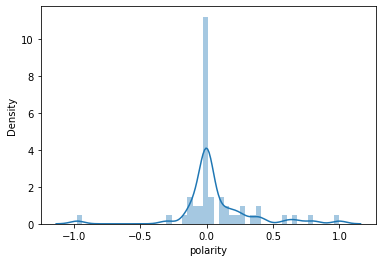

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(reviews_clean['polarity'])

In [22]:
import plotly.express as px
#create a function to compute the negativity, neutral and positive analysis
def getanalysis(score):
    if score <0:
        return 'Negative'
    if score == 0:
        return 'Neutral'
    if score > 0:
        return 'positive'
reviews_clean['Analysis']= reviews_clean['polarity'].apply(getanalysis) 

#plot the polarity and subjectivity
fig=px.scatter (reviews_clean,
               x='polarity',
               y='subjectivity',
               color='Analysis',
               size='subjectivity')
#add a vertical line at x=0 for Neutral Reviews
fig.update_layout(title='Sentimeny Analysis',
                 shapes=[dict(type='line',
                            yref='paper',y0= 0, y1= 1,
                             xref= 'x', x0=0,x1 = 0)])
fig.show()
        

ModuleNotFoundError: No module named 'plotly'

In [26]:
negative_review= reviews_clean[(reviews_clean['polarity']<-0)]
negative_review

,amazon_reviews,text_tokenize,reviews_no_sw,polarity,subjectivity
2,i am struggling to listen to other peoples talk,"[i, am, struggling, to, listen, to, other, peo...","[struggling, listen, peoples, talk]",-0.125000,0.375000
3,this is a common issue of pixel as i now unde...,"[this, is, a, common, issue, of, pixel, as, i,...","[common, issue, pixel, understand]",-0.300000,0.500000
4,if i knew this earlier i wouldnt have bought t...,"[if, i, knew, this, earlier, i, wouldnt, have,...","[knew, earlier, wouldnt, bought, thisin, phone...",-0.083333,0.416667
7,perhaps the under the display display is loose,"[perhaps, the, under, the, display, display, i...","[perhaps, display, display, loose]",-0.076923,0.269231
9,this issue can be a software issue too because...,"[this, issue, can, be, a, software, issue, too...","[issue, software, issue, sometimes, phone, cal...",-0.050000,0.383333
...,...,...,...,...,...
4023,this is only what i likednow on the negative side,"[this, is, only, what, i, likednow, on, the, n...","[likednow, negative, side]",-0.150000,0.700000
4029,got scared about above mentioned and i have pl...,"[got, scared, about, above, mentioned, and, i,...","[got, scared, mentioned, planned, return, prod...",-0.062500,0.237500
4031,this was my first online mobile shopping and i...,"[this, was, my, first, online, mobile, shoppin...","[first, online, mobile, shopping, im, badly, a...",-0.006667,0.533333
4045,very disappointed with the phone,"[very, disappointed, with, the, phone]","[disappointed, phone]",-0.975000,0.975000


In [27]:
positive_review=reviews_clean[(reviews_clean['polarity']>0)]
positive_review

,amazon_reviews,text_tokenize,reviews_no_sw,polarity,subjectivity
1,the phone call voice is too distorted and not ...,"[the, phone, call, voice, is, too, distorted, ...","[phone, call, voice, distorted, clear]",0.100000,0.383333
5,i think that is the cause of sound distortion,"[i, think, that, is, the, cause, of, sound, di...","[think, cause, sound, distortion]",0.400000,0.400000
10,i have ordered a bluetooth headset and waiting...,"[i, have, ordered, a, bluetooth, headset, and,...","[ordered, bluetooth, headset, waiting, see, ph...",0.100000,0.383333
11,however the calls are audible in my cars bluet...,"[however, the, calls, are, audible, in, my, ca...","[however, calls, audible, cars, bluetooth, spe...",0.602500,0.695000
12,the music and other sounds are clear and good,"[the, music, and, other, sounds, are, clear, a...","[music, sounds, clear, good]",0.225000,0.452778
...,...,...,...,...,...
4042,both are supporting vowifi and volte,"[both, are, supporting, vowifi, and, volte]","[supporting, vowifi, volte]",0.250000,0.250000
4050,one of the best phone i have ever used by all ...,"[one, of, the, best, phone, i, have, ever, use...","[one, best, phone, ever, used, prospective]",1.000000,0.300000
4051,camera quality much more better then those qua...,"[camera, quality, much, more, better, then, th...","[camera, quality, much, better, quad, cameras,...",0.333333,0.333333
4052,bettery life great for now,"[bettery, life, great, for, now]","[bettery, life, great]",0.800000,0.750000


In [28]:
neutral_reviews= reviews_clean[(reviews_clean['polarity']==0)]
neutral_reviews

,amazon_reviews,text_tokenize,reviews_no_sw,polarity,subjectivity
0,this phone has a severe defect of phone calls ...,"[this, phone, has, a, severe, defect, of, phon...","[phone, severe, defect, phone, calls, clarity]",0.0,0.000
6,when i take the phone i can feel something mov...,"[when, i, take, the, phone, i, can, feel, some...","[take, phone, feel, something, moving, inside,...",0.0,0.000
8,i dont know whether this phone has a repair se...,"[i, dont, know, whether, this, phone, has, a, ...","[dont, know, whether, phone, repair, service, ...",0.0,0.000
15,i shall update the results after using bluetoo...,"[i, shall, update, the, results, after, using,...","[shall, update, results, using, bluetooth, hea...",0.0,0.000
16,no headphone is supplied in the bundle,"[no, headphone, is, supplied, in, the, bundle]","[headphone, supplied, bundle]",0.0,0.000
...,...,...,...,...,...
4046,i used pixel xl ever since it was launched,"[i, used, pixel, xl, ever, since, it, was, lau...","[used, pixel, xl, ever, since, launched]",0.0,0.000
4047,the pixel instrument does not receive incoming...,"[the, pixel, instrument, does, not, receive, i...","[pixel, instrument, receive, incoming, signals]",0.0,0.000
4048,the service providers message of incoming call...,"[the, service, providers, message, of, incomin...","[service, providers, message, incoming, call, ...",0.0,0.000
4049,and pixel kept in the same area receives inc...,"[, and, pixel, kept, in, the, same, area, rece...","[, pixel, kept, area, receives, incoming, sign...",0.0,0.125


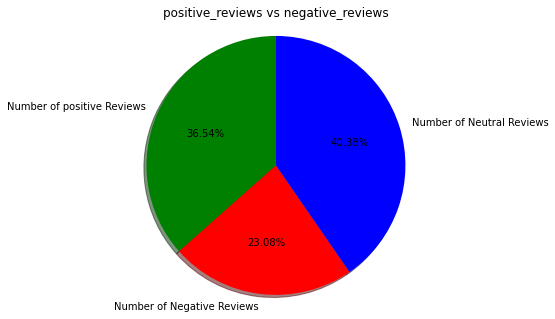

In [31]:
fig=plt.figure()
ax= fig.add_axes([0,0,1,1])
values=[len(positive_review), len(negative_review),len(neutral_reviews)]

ax.pie(values,
      labels=['Number of positive Reviews','Number of Negative Reviews','Number of Neutral Reviews'],
       colors=['green','red','blue'],
      shadow=True,
       startangle=90,
      autopct='%1.2f%%')
ax.axis('equal')
plt.title('positive_reviews vs negative_reviews');